In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,validation_curve,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,classification_report,plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib.colors import ListedColormap
import warnings
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

# Chargement  de datasets et suppression des variables non importante

In [148]:
data=pd.read_csv("Shill Bidding Dataset.csv",sep=',')
Y=data['Class'].values#la variable targete c'est les resultat
X=data.drop(columns=['Auction_ID','Record_ID','Bidder_ID','Class','Successive_Outbidding'],axis=1).values#la  variable qui jour le rele de X

# Affichage la destribution des données

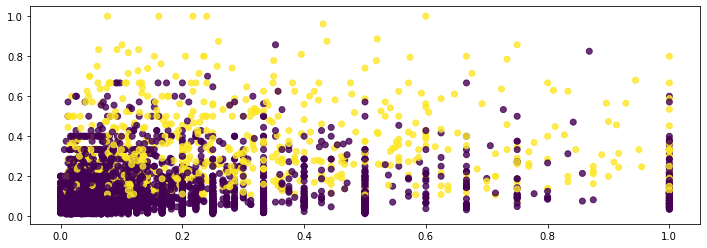

In [11]:
plt.figure(figsize=(12,4))
#plt.subplot(121)
plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c=Y,alpha=0.8 )
plt.show()

# Division de dataSets en traning et testing

In [149]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0, stratify=Y)
print(f' data_xtain{ x_train.shape } data_test { x_test.shape}')
print (f' data_ytrain {y_train.shape}  , data_ytest {y_test.shape}')

 data_xtain(5056, 8) data_test (1265, 8)
 data_ytrain (5056,)  , data_ytest (1265,)


# affichager la destribution de training et testing 


Text(0.5, 1.0, 'test set')

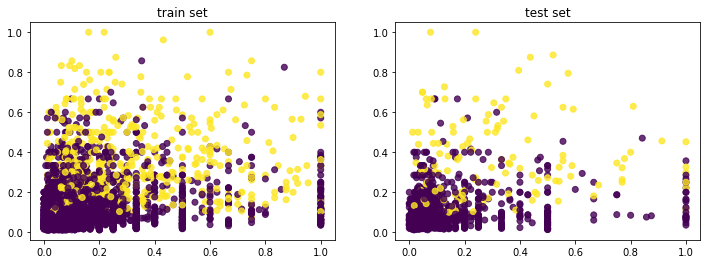

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train.iloc[:, 0],x_train.iloc[:, 1], c=y_train,alpha=0.8 )
plt.title('train set')
plt.subplot(122)
plt.scatter(x_test.iloc[:, 0],x_test.iloc[:, 1], c=y_test,alpha=0.8 )
plt.title('test set')

# 

# valider plusieurs paametres avce GridsearchCv 


In [82]:
def serchCV(model,param):
    GridCv = GridSearchCV(model,param,cv= StratifiedKFold(8),scoring='f1')
    GridCv.fit(x_train,y_train)
    return  GridCv  

# affichage de confusion_matrix

In [15]:
def plot_confusion_matrix1(model):
    matrix = plot_confusion_matrix(model,x_test,y_test, cmap=plt.cm.brg)
    matrix.ax_.set_title('Confusion Matrix',color = 'black')
    plt.xlabel('Predicted Label', color = 'black')
    plt.ylabel('True Label',color = 'black')
    plt.gcf().axes[0].tick_params(colors = 'black')
    plt.gcf().axes[1].tick_params(colors = 'black')
    plt.gcf().set_size_inches(10,6)
    plt.show

# Evaluation de modal

In [128]:
def evaluation(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    c_matrix = confusion_matrix(y_test,y_pred)
    print(c_matrix)#affichage de matrice de cofusion entre le vrai y_test et  le y_test predie
    plot_confusion_matrix1(model)
   # plt.figure(figsize=(12,4))
    #plt.subplot(121)
   # plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c=Y,alpha=0.8 )
    #plt.plot(X.iloc[:, 0], y_pred,c=Y)
    #plt.show()    
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

# validation croiser

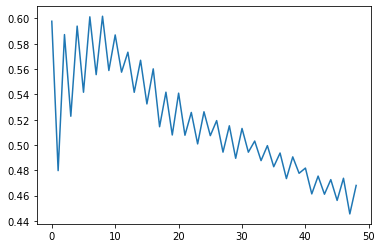

In [17]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),x_train,y_train,cv = StratifiedKFold(10), scoring='f1').mean()
    if(k == 1):
        m=k
    elif(score > max(val_score)):
        m = k
    val_score.append(score)
plt.plot(val_score)
plt.show()

In [18]:
print(m,max(val_score))


9 0.6016758197022717


# KNN

In [ ]:
 paramKNN = {'n_neighbors' : np.arange(1,20), 'metric' : ['Euclidean', 'manhattan', 'minkowski']}

In [24]:
model = KNeighborsClassifier()


# valider un meilleurs parametre un seul avec validation_curve aussi avec elle on peut voir le underfiting et overfiting

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


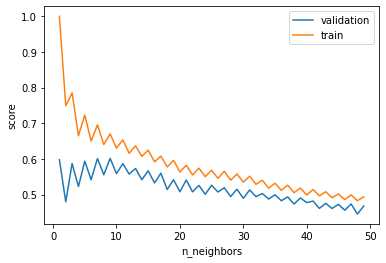

In [25]:
train_score,val_score = validation_curve(model, x_train, y_train, 'n_neighbors', np.arange(1,50), cv = StratifiedKFold(10), scoring='f1')
plt.plot(np.arange(1,50),val_score.mean(axis = 1), label = 'validation')
plt.plot(np.arange(1,50),train_score.mean(axis = 1), label = 'train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [28]:
GridCv = serchCV(model,paramKNN)

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid op

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid op

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid op

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid op

/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/home/rachida/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'Euclidean' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid op

In [29]:
GridCv.best_score_

0.6094114326052789

In [30]:
GridCv.best_params_

{'metric': 'minkowski', 'n_neighbors': 9}

In [31]:
GridCv.best_estimator_

KNeighborsClassifier(n_neighbors=9)

# sauvgarder le model 

In [32]:
model=GridCv.best_estimator_

[[1099   31]
 [  63   72]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1130
           1       0.70      0.53      0.61       135

    accuracy                           0.93      1265
   macro avg       0.82      0.75      0.78      1265
weighted avg       0.92      0.93      0.92      1265

0.9256916996047431


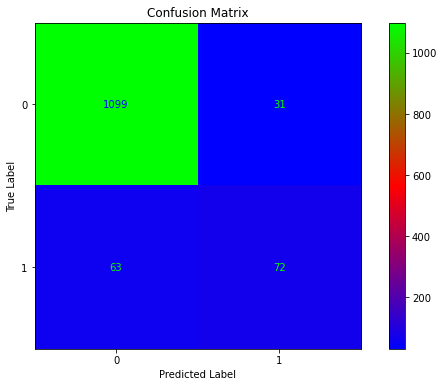

In [33]:
evaluation(model)


# dddd

# svm 


In [116]:
paramSVM = {'C': [0.1, 1, 10, 100, 1000],  'gamma':[1e-2,1e-3,1e-4],'kernel':['linear','rbf']}

In [119]:
model =  SVC(random_state=0)

In [ ]:
GridCv = serchCV(model,paramSVM)
GridCv.best_score_
GridCv.best_params_
GridCv.best_estimator_
model = GridCv.best_estimator_
evaluation(model)

In [120]:
GridCv = serchCV(model,paramSVM)

In [121]:
GridCv.best_score_

0.6830077008354049

In [122]:
GridCv.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [123]:
GridCv.best_estimator_

SVC(C=1000, gamma=0.01, random_state=0)

In [124]:
model=GridCv.best_estimator_

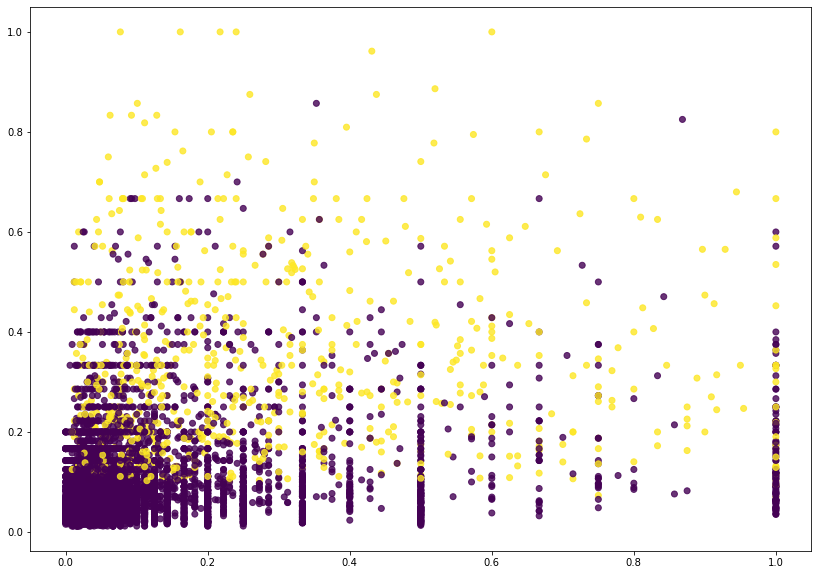

In [156]:
plt.figure(figsize=(14,10))
#plt.subplot(121)
plt.scatter(X[:, 0],X[:, 1], c=Y,alpha=0.8 )
plt.show()

In [161]:
model

SVC(C=1000, gamma=0.01, random_state=0)

In [187]:
# Visualize the decision boundaries
plt.figure(figsize=(10,10))
#plot_decision_regions(X=X[:, 0],y=Y, clf=model)
value = 2
width = 1.75

#fig, ax = plt.subplots()

plot_decision_regions(X, Y, clf=model,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ValueError: X must be a 2D array. Found (6321,)

<Figure size 720x720 with 0 Axes>

[[1104   26]
 [  43   92]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.78      0.68      0.73       135

    accuracy                           0.95      1265
   macro avg       0.87      0.83      0.85      1265
weighted avg       0.94      0.95      0.94      1265

0.9454545454545454


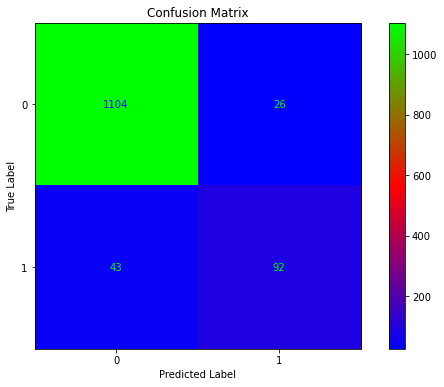

In [129]:
evaluation(model)

# Tree

In [ ]:
model= DecisionTreeClassifier(random_state=0)